# Random Resampling

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Generating the features and targets dataset

In [2]:
# Generate Data
X, y = make_blobs(n_samples=[5000, 50], random_state=1, cluster_std=7)

# Convert ndarray to pandas datatypes
X = pd.DataFrame(X)
y = pd.Series(y)

In [3]:
X

,0,1
0,10.784575,16.748598
1,-0.355994,4.379680
2,7.138120,0.050296
3,-1.272852,15.020593
4,-4.442480,6.919706
...,...,...
5045,-9.032274,6.317847
5046,-6.041695,3.062038
5047,-4.439440,10.609119
5048,1.470667,-0.466405


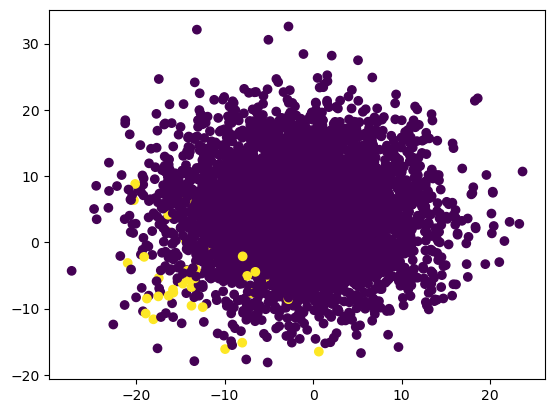

In [4]:
# Plot data
plt.scatter(
    x=X[0],
    y=X[1],
    c=y)
plt.show()

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Count distinct values
y_train.value_counts()

0    3753
1      34
Name: count, dtype: int64

---

## Random Undersampling
---
We need to import the RandomUnderSampler function from the imbalance learn module, `imblearn.under_sampling` as follows: 
* `pip install imbalanced-learn`.

In [8]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [10]:
type(y_resampled)

pandas.core.series.Series

In [11]:
# Count distinct resampled values
y_resampled.value_counts()

0    34
1    34
Name: count, dtype: int64

In [13]:
# Instantiate an initial RamdonForestClassifier instance
model = RandomForestClassifier()

# Fit the initial model based the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Instantiate a second RamdonForestClassifier instance
model_resampled = RandomForestClassifier()

# Fit the second model based the resampled data
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [15]:
# Make predictions using the initial model
y_preds = model.predict(X_test)

# Make predictions using the model based on the resampled data
y_resampled_preds = model_resampled.predict(X_test)

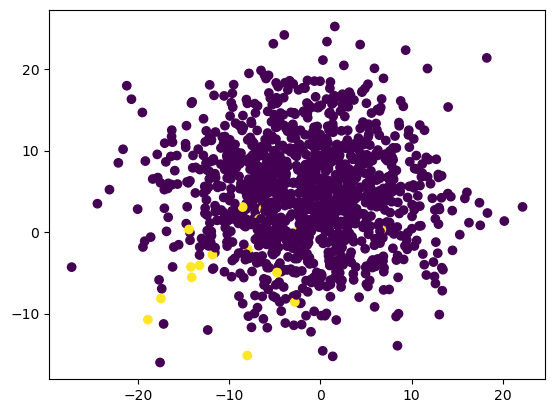

In [16]:
# Plot the data using the original y_test information
plt.scatter(
    x=X_test[0],
    y=X_test[1],
    c=y_test)
plt.show()

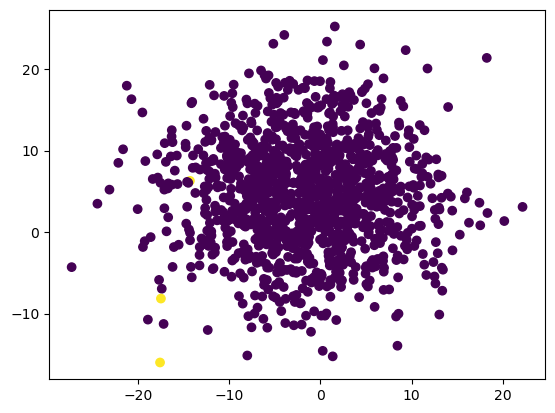

In [18]:
# Plot the data using the predictions based on the original test data
plt.scatter(
    x=X_test[0],
    y=X_test[1],
    c=y_preds)
plt.show()

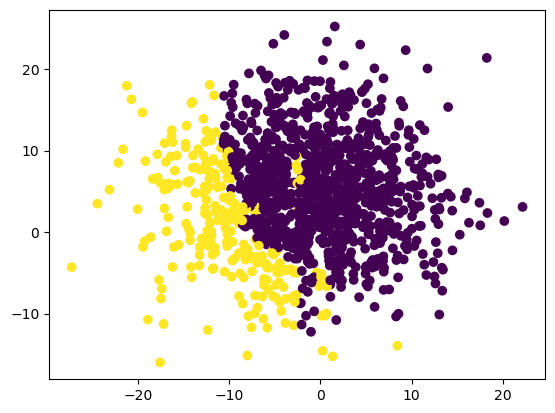

In [19]:
# Plot the data using the predictions based on the resampled test data
plt.scatter(
    x=X_test[0],
    y=X_test[1],
    c=y_resampled_preds)
plt.show()

In [21]:
# Print classification report
print(classification_report(y_test, y_preds))
print(classification_report(y_test, y_resampled_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.33      0.06      0.11        16

    accuracy                           0.99      1263
   macro avg       0.66      0.53      0.55      1263
weighted avg       0.98      0.99      0.98      1263

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1247
           1       0.05      0.75      0.09        16

    accuracy                           0.81      1263
   macro avg       0.52      0.78      0.49      1263
weighted avg       0.98      0.81      0.88      1263



---

## Random Oversampling

In [22]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

In [23]:
# Count distinct values
y_resampled.value_counts()

0    3753
1    3753
Name: count, dtype: int64

In [24]:
# Create a RandomForestClassifier instance and fit it to the original data
model=RandomForestClassifier()
model.fit(X_train, y_train)

# Create a RandomForestClassifier instance and fit it to the resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [25]:
# Make predictions for testing features
y_preds = model.predict(X_test)

# Make predictions using the model based on the resampled data
y_resampled_preds = model_resampled.predict(X_test)

In [26]:
# Print the classification reports for the two models
print(classification_report(y_test, y_preds))
print(classification_report(y_test, y_resampled_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.50      0.06      0.11        16

    accuracy                           0.99      1263
   macro avg       0.74      0.53      0.55      1263
weighted avg       0.98      0.99      0.98      1263

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.50      0.19      0.27        16

    accuracy                           0.99      1263
   macro avg       0.74      0.59      0.63      1263
weighted avg       0.98      0.99      0.98      1263

